In [142]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [158]:
# im = cv2.imread("./kuma/out/09/09_0.png", cv2.IMREAD_COLOR)
im = cv2.imread("test.png", cv2.IMREAD_COLOR)

In [159]:
im_L = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)[:,:,0]

In [160]:
im_LF = im_L.flatten()

In [162]:
hist = np.histogram(im_LF, np.arange(0,257))
im_count = np.array(hist[0], np.float32)
im_count[100:150]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   3.,   6.,  10.,
        19.,  14.,  20.,  21.,  22.,  24.,  27.,  29.,  34.,  39.,  37.,
        35.,  29.,  39.,  35.,  36.,  39.,  50.,  47.,  53.,  52.,  47.,
        63.,  50.,  58.,  55.,  57.,  80.,  67.,  67.,  73.,  77.,  76.,
        56.,  81.,  71.,  70.,  75.,  78.], dtype=float32)

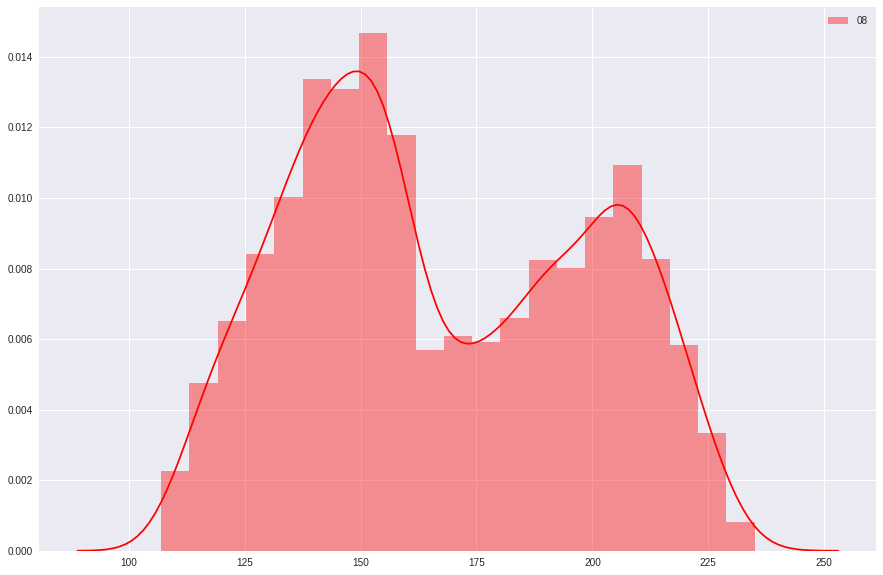

In [147]:
plt.subplots(figsize=(15,10))
sns.distplot(im_LF, color='r', label='08')
plt.legend()
plt.show()

In [148]:
im_class = [i for i in range(0,256)]

In [149]:
im_count

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   3.,   6.,
        10.,  19.,  14.,  20.,  21.,  22.,  24.,  27.,  29.,  34.,  39.,
        37.,  35.,  29.,  39.,  35.,  36.,  39.,  50.,  47.,  53.,  52.,
        47.,  63.,  50.,  58.,  55.,  57.,  80.,  67.,  67.,  73.,  77.,
        76.,  56.,  81.,  71.,  70.,  75.,  78.,  6

In [150]:
im_count_ratio = im_count / im_count.sum()
im_count_acc_ratio = im_count_ratio.cumsum()

In [151]:
im_color = im_count * im_class
im_color_ratio = im_color / im_color.sum()
im_color_acc_ratio = im_color_ratio.cumsum()

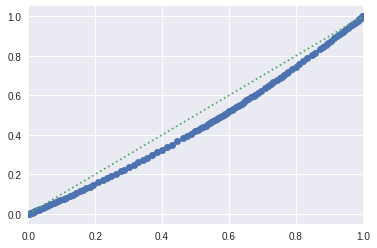

In [152]:
p = plt.subplot()
p.plot(im_count_acc_ratio, im_color_acc_ratio, marker="o")

ref_x = [float(i/10.0) for i in range(11)]
ref_y = [float(i/10.0) for i in range(11)]

p.plot(ref_x, ref_y, linestyle="dotted")
p.set_xlim([0, 1.0])
plt.show()

In [153]:
def gini(x, y):
    area = []
    for i in range(1, len(x)):
        y_plus = y[i-1] + y[i]
        area.append(y_plus * (x[i] - x[i-1]) / 2.0)
    
#     print(area)
    return (0.5 - np.sum(area))*2.0

In [154]:
gini(im_count_acc_ratio, im_color_acc_ratio)

0.10864337437105631